Report Structure and Key Metrics
General Report
Section 1: Best Selling Products

List top 10 products by revenue.
Visualize with a bar chart or Pareto chart for cumulative revenue share.
Section 2: Weekly Sales Performance

Line chart showing total sales value by week.
Insights into seasonal/weekly trends.
Section 3: Customer Analysis

Pie chart of one-time vs. repeat customers.
Metrics: Average revenue per customer and proportion of revenue from repeat customers.
Section 4: Operational Insights

KPIs like average transaction value and average items per transaction.

# Objectives
*General Report Objectives (For Managers)*

1. Identify Top Revenue Drivers:
    - Analyze best-selling products and products contributing the most to revenue.
2. Understand Customer Behavior:
    - Explore the proportion of one-time vs. repeat customers.
3. Monitor Sales Performance:
    - Highlight weekly sales trends and peaks in performance.
4. Analyze Operational Metrics:
    - Provide insights into sales efficiency (e.g., average revenue per transaction, average items sold per order).

In [1]:
# Load the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Load the cleaned data
df = pd.read_csv('../data/preprocessed_data/cleaned_sales.csv')
df.head()


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,2019-12-09,22485,SET OF 2 WOODEN MARKET CRATES,21.47,12,17490,UNITED KINGDOM
1,581475,2019-12-09,22596,CHRISTMAS STAR WISH LIST CHALKBOARD,10.65,36,13069,UNITED KINGDOM
2,581475,2019-12-09,23235,STORAGE TIN VINTAGE LEAF,11.53,12,13069,UNITED KINGDOM
3,581475,2019-12-09,23272,TREE T-LIGHT HOLDER WILLIE WINKIE,10.65,12,13069,UNITED KINGDOM
4,581475,2019-12-09,23239,SET OF 4 KNICK KNACK TINS POPPIES,11.94,6,13069,UNITED KINGDOM


# Section 1: Best Selling Products




## Pareto Analysis.

Description: 

Goal:


In [2]:
# # Calculate frequency of purchases
# frequency = df.groupby('ProductNo').size()
# frequency = frequency.reset_index() # Convert the series to a dataframe
# frequency.columns = ['ProductNo', 'Frequency'] # Rename the columns

# # Calculate cumulative percentage of purchases
# frequency['CumulativeFreq'] = frequency['Frequency'].cumsum()
# frequency['CumulativePct'] = frequency['CumulativeFreq'] / frequency['Frequency'].sum() * 100
# # Sort the dataframe by Frequency in descending order
# frequency = frequency.sort_values(by='Frequency', ascending=False, ignore_index=True) 
# # frequency.head(10)


In [3]:
# Calculate frequency of purchases
frequency = df.groupby('ProductNo').size().reset_index(name='Frequency')

# Sort by Frequency in descending order
frequency = frequency.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Calculate cumulative frequency and cumulative percentage (after sorting)
frequency['CumulativeFreq'] = frequency['Frequency'].cumsum()
frequency['CumulativePct'] = frequency['CumulativeFreq'] / frequency['Frequency'].sum() * 100

frequency.head(10)


,ProductNo,Frequency,CumulativeFreq,CumulativePct
0,85123A,2206,2206,0.466393
1,85099B,1747,3953,0.835744
2,22423,1639,5592,1.182261
3,47566,1587,7179,1.517785
4,20725,1371,8550,1.807642
5,84879,1359,9909,2.094961
6,22720,1244,11153,2.357968
7,22197,1242,12395,2.620552
8,20727,1238,13633,2.882290
9,22457,1215,14848,3.139165


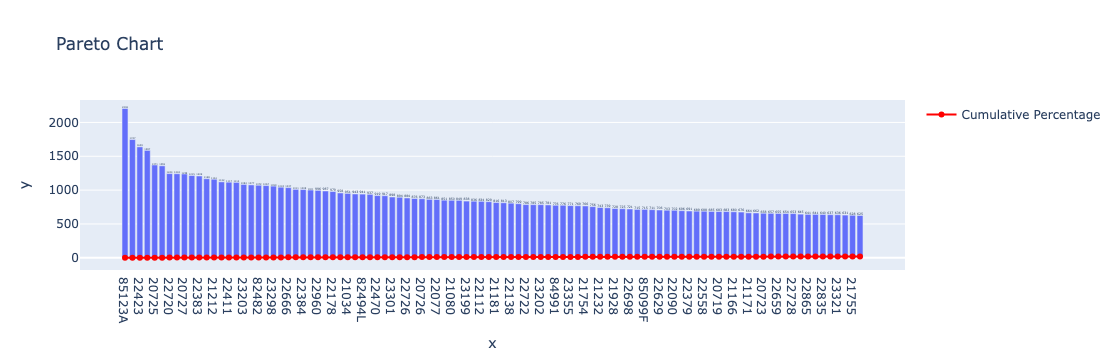

In [7]:
# Interactive Pareto chart
import matplotlib.pyplot as plt
import plotly.express as px

# Left y-axis values: Frequency
# Right y-axis values: Cumulative Percentage
# X-axis values: ProductNo top 100



fig = px.bar(
    frequency[:100],
    x=frequency['ProductNo'][:100],
    y=frequency['Frequency'][:100],
    text='Frequency',
    title='Pareto Chart',
    labels={'Frequency': 'Frequency', 'ProductNo': 'Product Number'}
)

# Add cumulative percentage line
fig.add_scatter(
    x=frequency['ProductNo'][:100],
    y=frequency['CumulativePct'][:100],
    mode='lines+markers',
    name='Cumulative Percentage',
    line=dict(color='red'),
)

# Update hover information for interactivity
fig.update_traces(hovertemplate='ProductNo: %{x}<br>Frequency: %{y}')

# Display the chart
fig.show()

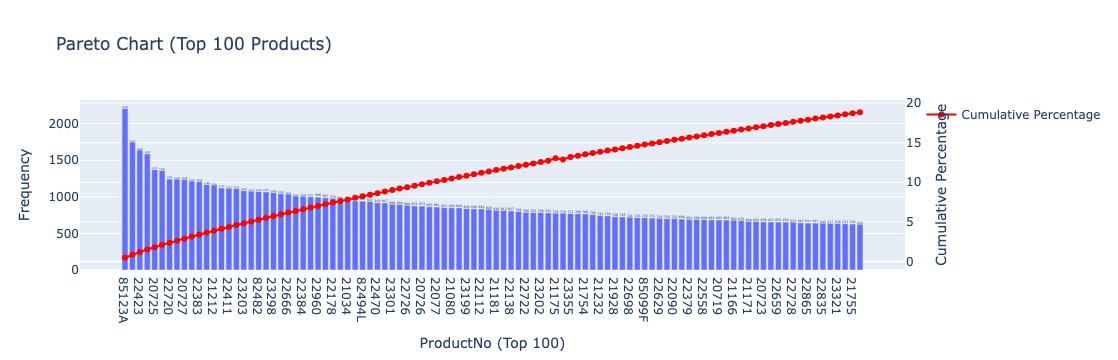

In [9]:
import plotly.express as px

# Sort your data by Frequency in descending order FIRST
frequency = frequency.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Create a bar chart with Plotly Express
fig = px.bar(
    frequency[:100],
    x='ProductNo',
    y='Frequency',
    text='Frequency',
    title='Pareto Chart (Top 100 Products)',
    labels={'Frequency': 'Frequency', 'ProductNo': 'Product Number'}
)

# Add the cumulative percentage line on a secondary y-axis
fig.add_scatter(
    x=frequency['ProductNo'][:100],
    y=frequency['CumulativePct'][:100],
    mode='lines+markers',
    name='Cumulative Percentage',
    line=dict(color='red'),
    yaxis='y2'
)

# Configure both y-axes and the x-axis
fig.update_layout(
    xaxis=dict(
        title='ProductNo (Top 100)'
    ),
    yaxis=dict(
        title='Frequency'
    ),
    yaxis2=dict(
        title='Cumulative Percentage',
        overlaying='y',
        side='right'
    )
)

# (Optional) Update hover templates or annotations as needed
fig.update_traces(hovertemplate='ProductNo: %{x}<br>Value: %{y}')

fig.show()


In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Plot the frequency of purchases
ax1.bar(frequency['ProductNo'][:10], frequency['Frequency'][:10], color='C0')
ax1.set_xlabel('ProductNo')
ax1.set_ylabel('Frequency', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

# Create a second y-axis to plot the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(frequency['ProductNo'][:10], frequency['CumalativePct'][:10], color='C1', marker='D', ms=5)
ax2.set_ylabel('Cumulative Percentage', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

plt.title('Pareto Chart')
plt.show()